In [2]:
import numpy, scipy, matplotlib, cartopy, netCDF4, seaborn, mogreps

In [3]:
from pathlib import Path

In [4]:
forecast_3 = mogreps.download_data('mogreps-uk', mogreps.make_data_object_name('mogreps-uk', 2016, 1, 29, 15, 0 , 3),data_folder = Path('.'))
forecast_9 = mogreps.download_data('mogreps-uk', mogreps.make_data_object_name('mogreps-uk', 2016, 1, 29, 9, 0 , 9),data_folder = Path('.'))
forecast_15 = mogreps.download_data('mogreps-uk', mogreps.make_data_object_name('mogreps-uk', 2016, 1, 29, 3, 0 , 15),data_folder = Path('.'))
forecast_21 = mogreps.download_data('mogreps-uk', mogreps.make_data_object_name('mogreps-uk', 2016, 1, 28, 21, 0 , 21),data_folder = Path('.'))
forecast_27 = mogreps.download_data('mogreps-uk', mogreps.make_data_object_name('mogreps-uk', 2016, 1, 28, 15, 0 , 27),data_folder = Path('.'))
forecast_33 = mogreps.download_data('mogreps-uk', mogreps.make_data_object_name('mogreps-uk', 2016, 1, 28, 9, 0 , 33),data_folder = Path('.'))

File prods_op_mogreps-uk_20160129_15_00_003.nc already exists.
File prods_op_mogreps-uk_20160129_09_00_009.nc already exists.
File prods_op_mogreps-uk_20160129_03_00_015.nc already exists.
File prods_op_mogreps-uk_20160128_21_00_021.nc already exists.
File prods_op_mogreps-uk_20160128_15_00_027.nc already exists.
File prods_op_mogreps-uk_20160128_09_00_033.nc already exists.


In [14]:
DS_forecast_3 = netCDF4.Dataset(forecast_3)
DS_forecast_9 = netCDF4.Dataset(forecast_9)
DS_forecast_15 = netCDF4.Dataset(forecast_15)
DS_forecast_21 = netCDF4.Dataset(forecast_21)
DS_forecast_27 = netCDF4.Dataset(forecast_27)
DS_forecast_33 = netCDF4.Dataset(forecast_33)

forecasts = [DS_forecast_3, DS_forecast_9, DS_forecast_15, DS_forecast_21, DS_forecast_27, DS_forecast_33]

In [15]:
import cartopy.crs as ccrs
from matplotlib import pyplot as plt

Text(0.5,0.98,'Forecasts for sea-level air pressure (Pa) 6pm 29th January 2016 at a variety of lead times')

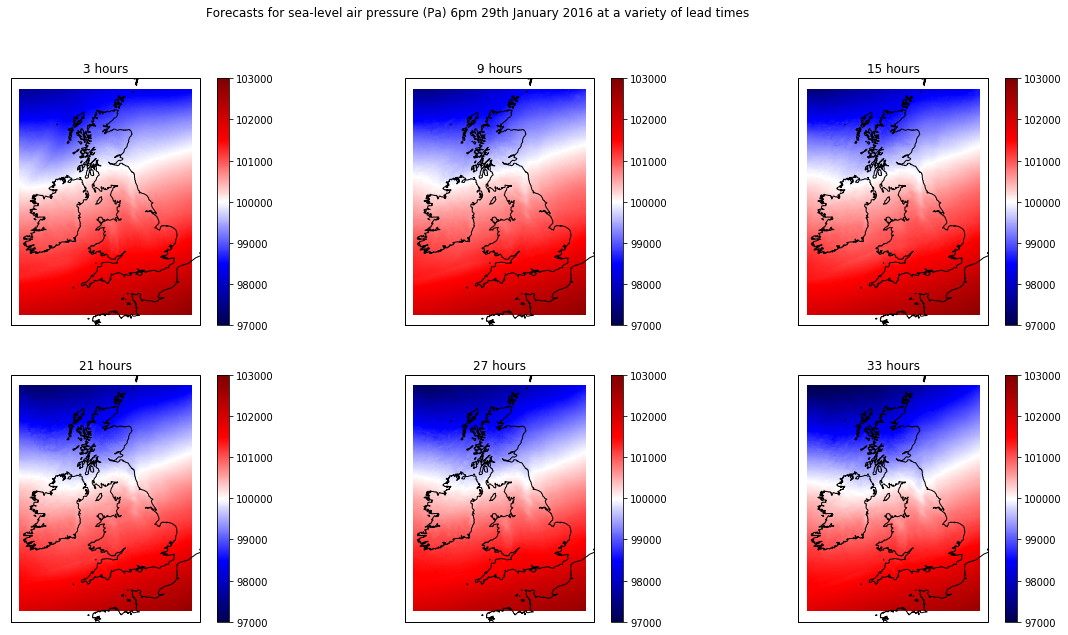

In [16]:
test_variable = "air_pressure_at_sea_level"
v_min = 97500
v_max = 103000

rotation = forecasts[0]['rotated_latitude_longitude']
transform = ccrs.RotatedPole(pole_longitude=rotation.grid_north_pole_longitude, pole_latitude = rotation.grid_north_pole_latitude)
projection = transform
fig = plt.figure(figsize=(20,10))
for i in range(0,6):
    ax = fig.add_subplot(2,3,i+1, projection=projection)
    pcm = ax.pcolormesh(
        forecasts[i]['grid_longitude'],
        forecasts[i]['grid_latitude'],
        forecasts[i][test_variable][2],
        transform=transform, vmin = 97000, vmax = 103000, cmap = 'seismic')
    ax.coastlines(resolution='10m')
    ax.set_title(str(6*(i+1)-3)+" hours")
    plt.colorbar(pcm,ax=ax)

fig.suptitle('Forecasts for sea-level air pressure (Pa) 6pm 29th January 2016 at a variety of lead times')

TEXT TBA


<center>
![Alt Text](https://i.imgur.com/YVcP6O6.gif)
</center>

Text(0.5,0.98,'Differences between various lead-times and the 3 hour sea-level air pressure forecast for 6pm 29th January 2016')

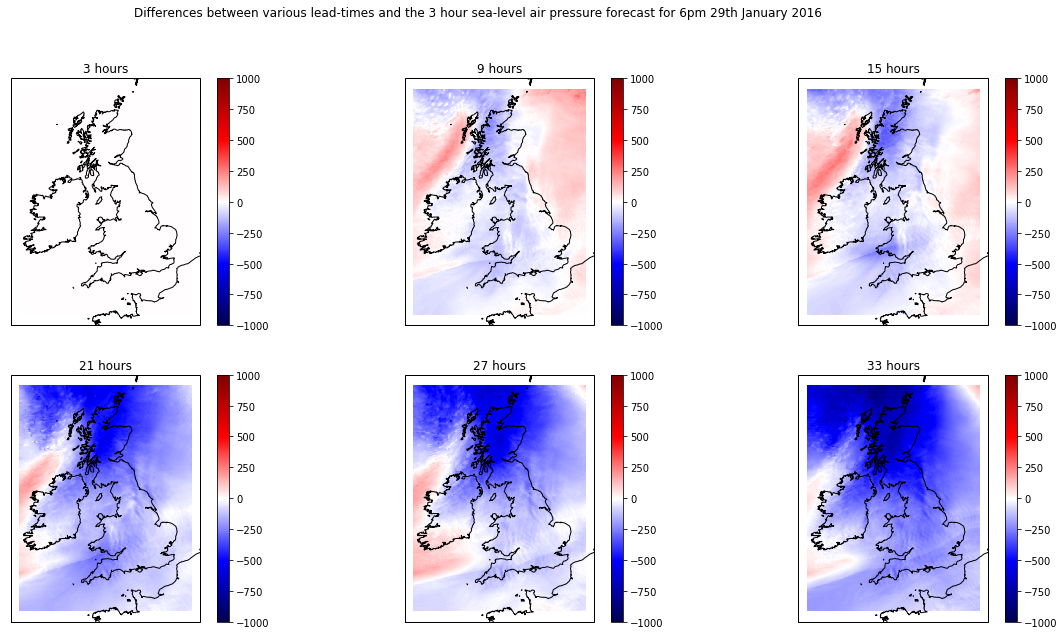

In [17]:
test_variable = "air_pressure_at_sea_level"
v_min = -1000
v_max = 1000

rotation = forecasts[0]['rotated_latitude_longitude']
transform = ccrs.RotatedPole(pole_longitude=rotation.grid_north_pole_longitude, pole_latitude = rotation.grid_north_pole_latitude)
projection = transform
fig = plt.figure(figsize=(20,10))
for i in range(0,6):
    ax = fig.add_subplot(2,3,i+1, projection=projection)
    pcm = ax.pcolormesh(
        forecasts[i]['grid_longitude'],
        forecasts[i]['grid_latitude'],
        forecasts[i][test_variable][2] - forecasts[0][test_variable][2],
        transform=transform, vmin = v_min, vmax = v_max, cmap = 'seismic')
    ax.coastlines(resolution='10m')
    ax.set_title(str(6*(i+1)-3)+" hours")
    plt.colorbar(pcm,ax=ax)
    
fig.suptitle('Differences between various lead-times and the 3 hour sea-level air pressure forecast for 6pm 29th January 2016')

Text(0.5,0.98,'Forecasted rainfall rate (kg m-2 s-1) 6pm 5th December 2015')

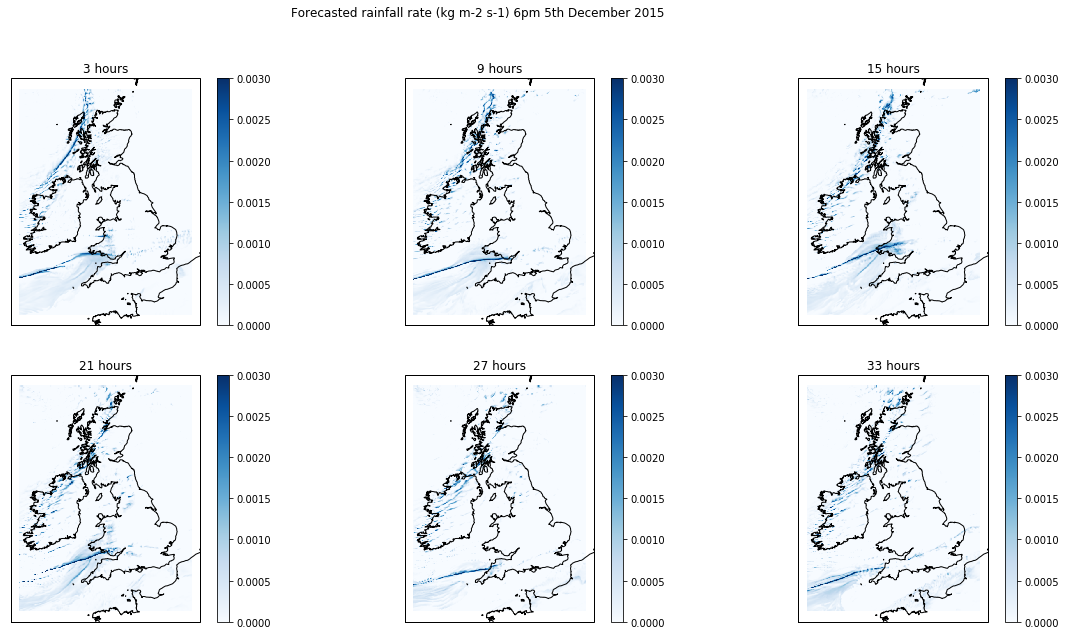

In [18]:
test_variable = "stratiform_rainfall_rate"
v_min = 0
v_max = 0.003


rotation = forecasts[0]['rotated_latitude_longitude']
transform = ccrs.RotatedPole(pole_longitude=rotation.grid_north_pole_longitude, pole_latitude = rotation.grid_north_pole_latitude)
projection = transform
fig = plt.figure(figsize=(20,10))
for i in range(0,6):
    ax = fig.add_subplot(2,3,i+1, projection=projection)
    pcm = ax.pcolormesh(
        forecasts[i]['grid_longitude'],
        forecasts[i]['grid_latitude'],
        forecasts[i][test_variable][35],
        transform=transform, vmin = v_min, vmax = v_max, cmap = 'Blues')
    ax.coastlines(resolution='10m')
    ax.set_title(str(6*(i+1)-3)+" hours")
    plt.colorbar(pcm,ax=ax)
fig.suptitle("Forecasted rainfall rate (kg m-2 s-1) 6pm 5th December 2015")

Text(0.5,0.98,'Difference between rainfall rate (kg m-2 s-1) 6pm 5th December 2015')

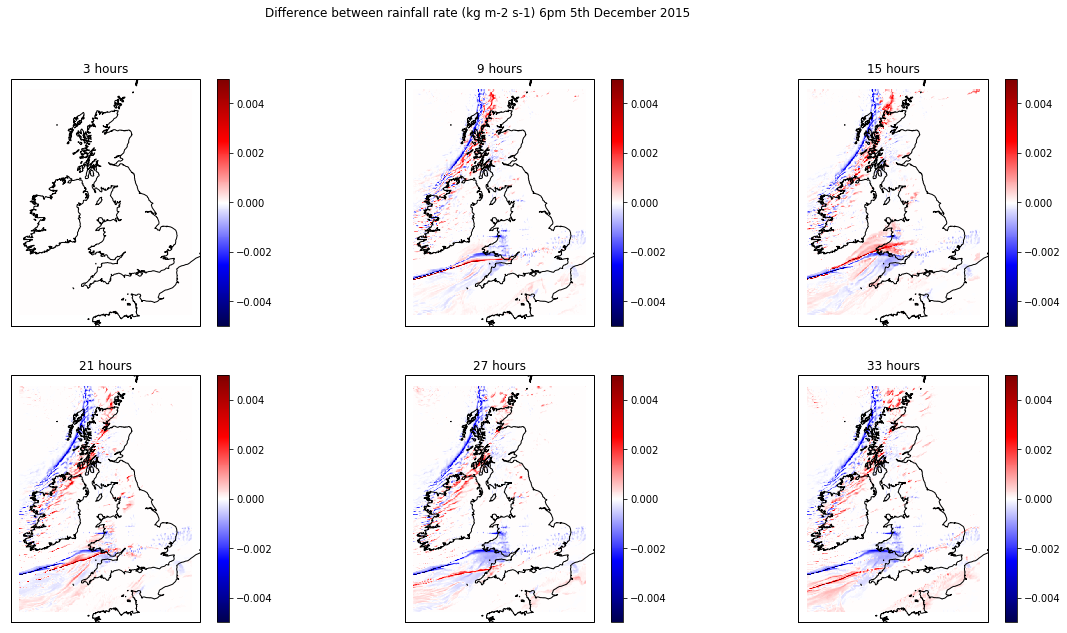

In [19]:
test_variable = "stratiform_rainfall_rate"
v_min = -0.005
v_max = 0.005


rotation = forecasts[0]['rotated_latitude_longitude']
transform = ccrs.RotatedPole(pole_longitude=rotation.grid_north_pole_longitude, pole_latitude = rotation.grid_north_pole_latitude)
projection = transform
fig = plt.figure(figsize=(20,10))
for i in range(0,6):
    ax = fig.add_subplot(2,3,i+1, projection=projection)
    pcm = ax.pcolormesh(
        forecasts[i]['grid_longitude'],
        forecasts[i]['grid_latitude'],
        forecasts[i][test_variable][35] - forecasts[0][test_variable][35],
        transform=transform, vmin = v_min, vmax = v_max, cmap = 'seismic')
    ax.coastlines(resolution='10m')
    ax.set_title(str(6*(i+1)-3)+" hours")
    plt.colorbar(pcm,ax=ax)
fig.suptitle("Difference between rainfall rate (kg m-2 s-1) 6pm 5th December 2015")